In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0, inplace=True)

In [6]:
df_airline.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
# converting Month column from object to Datatime format
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
# setting month column as index
df_airline.set_index('Month', inplace=True)

In [11]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot: xlabel='Month'>

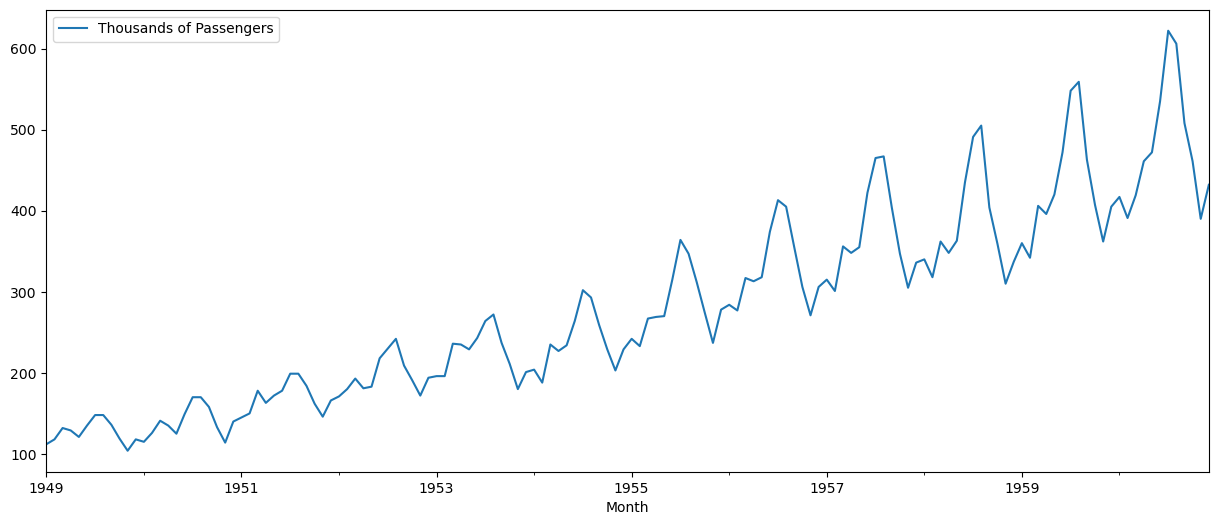

In [12]:
# plotting 
df_airline.plot(figsize=(15,6))

Seasonal data But not stationary data

In [13]:
# importing stat library for doing Dicky fooler test 
from statsmodels.tsa.stattools import adfuller

In [14]:
#Null hypothesis: Data is non stationay 
# Alternate Hypothesis: Data is Stationary

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- Value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypotheis, reject the null hypothesis. Data has no unit root and is stationary. ')
    else: 
        print('Weak evidence against nullhypothesis, Accept the null hypothesis. The time series has a unit root, indicating it is not stationary')

In [15]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060543
p- Value: 0.9918802434376411
Weak evidence against nullhypothesis, Accept the null hypothesis. The time series has a unit root, indicating it is not stationary


In [16]:
# using diffrencing technique to make data stationary 
df_airline['Passngers first difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [17]:
df_airline.head()

,Thousands of Passengers,Passngers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [18]:
# checking after differencing is the date become stationary 
adf_test(df_airline['Passngers first difference'].dropna())

ADF Statistics: -2.8292668241700034
p- Value: 0.054213290283824954
Weak evidence against nullhypothesis, Accept the null hypothesis. The time series has a unit root, indicating it is not stationary


In [19]:
# doing second difference
df_airline['Passangers second difference'] = df_airline['Passngers first difference']-df_airline['Passngers first difference'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passngers first difference,Passangers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [21]:
adf_test(df_airline['Passangers second difference'].dropna())

ADF Statistics: -16.384231542468488
p- Value: 2.7328918500143186e-29
Strong evidence against the null hypotheis, reject the null hypothesis. Data has no unit root and is stationary. 


In [22]:
# Since it is seasonal data doing 12 months
# use diffrencing technique 

df_airline['Passngers 12 difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passngers 12 difference'].dropna())

ADF Statistics: -3.3830207264924805
p- Value: 0.011551493085514982
Strong evidence against the null hypotheis, reject the null hypothesis. Data has no unit root and is stationary. 


In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

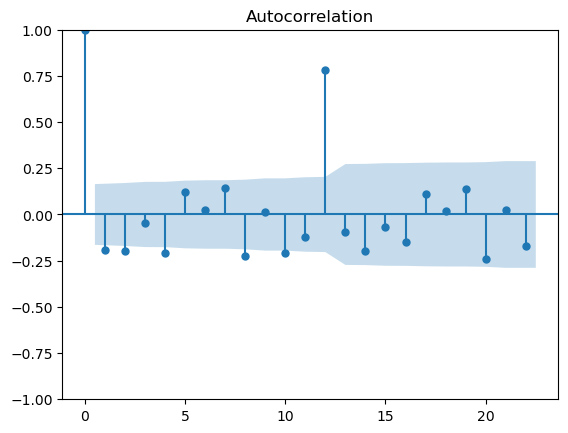

In [25]:
acf = plot_acf(df_airline['Passangers second difference'].dropna())
# based on below graph q selected is q=13

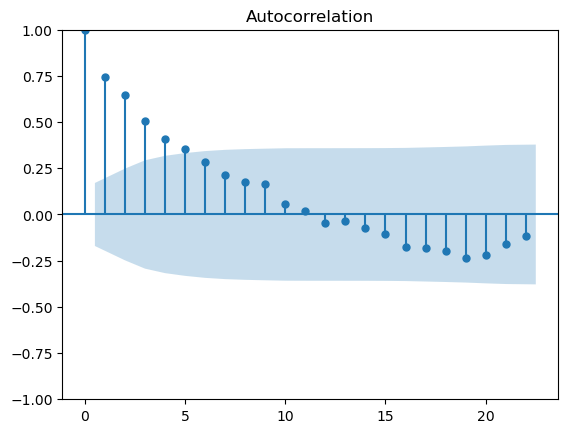

In [26]:
acf12 = plot_acf(df_airline['Passngers 12 difference'].dropna())
# based on below graph q selected is q=5. 

C:\Users\dell\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


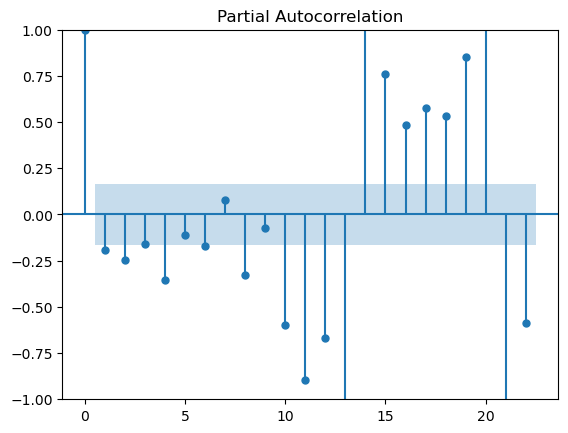

In [27]:
# plot PACF plot
result = plot_pacf(df_airline['Passangers second difference'].dropna())

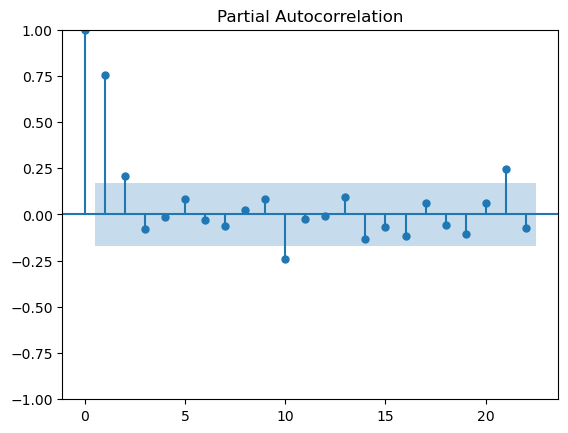

In [28]:
pacf12 = plot_pacf(df_airline['Passngers 12 difference'].dropna())
# P values selected based on below graph P=2 and next value P=10. 

In [29]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955, 12, 1)
test_dataset_end=datetime(1960, 12,1)

In [30]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
# predictions
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [32]:
test_data

,Thousands of Passengers,Passngers first difference,Passangers second difference,Passngers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [33]:
## Creatig ARIMA model
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [34]:
# order p,d & q values from above graphs
model_ARIMA=ARIMA(train_data['Thousands of Passengers'], order=(14,2,0)) # if fit below command do not work try q=0

C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
model_arima_fit=model_ARIMA.fit()

C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(14, 2, 0)   Log Likelihood                -306.734
Date:                     Tue, 27 Feb 2024   AIC                            643.468
Time:                             18:28:02   BIC                            679.568
Sample:                         01-01-1949   HQIC                           657.962
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1360      0.155     -7.346      0.000      -1.439      -0.833
ar.L2         -1.1946      0.220     -5.423      0.000      -1.626      -0.763
ar.L3         -1.4501      0.280     -5.177      0.000      -1.999      -0.901
ar.L4         -1.4987      0.277     -5.409      0.000      -2.042      -0.956
ar.L5         -1.4364      0.275     -5.230      0.000      -1.975      -0.898
ar.L6         -1.4582      0.285     -5.116      0.000      -2.017      -0.900
ar.L7         -1.3966      0.286     -4.880      0.000      -1.958      -0.836
ar.L8         -1.5140      0.298     -5.085      0.000      -2.097      -0.930
ar.L9         -1.4122      0.312     -4.530      0.000      -2.023      -0.801
ar.L10        -1.4616      0.312     -4.678      0.000      -2.074      -0.849
ar.L11        -1.3634      0.327     -4.166      0.000      -2.005      -0.722
ar.L12        -0.5598      0.312     -1.795      0.073      -1.171       0.052
ar.L13        -0.2860      0.288     -0.992      0.321      -0.851       0.279
ar.L14        -0.3181      0.169     -1.881      0.060      -0.650       0.013
sigma2        92.5857     23.435      3.951      0.000      46.654     138.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.92   Prob(JB):                         0.24
Heteroskedasticity (H):               2.15   Skew:                             0.46
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [38]:
pred=model_arima_fit.predict(start=pred_start_date, end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [39]:
residuals

Month
1956-01-01     -9.029079
1956-02-01     -9.373683
1956-03-01     10.248698
1956-04-01     -2.103006
1956-05-01      1.468219
1956-06-01     11.531998
1956-07-01      5.361476
1956-08-01     16.135684
1956-09-01     -2.094151
1956-10-01    -16.565457
1956-11-01    -19.863640
1956-12-01    -17.931306
1957-01-01    -28.761861
1957-02-01    -31.140252
1957-03-01      5.733037
1957-04-01    -12.585784
1957-05-01    -10.508599
1957-06-01     13.566236
1957-07-01     13.903666
1957-08-01     35.637155
1957-09-01      2.425987
1957-10-01    -25.152282
1957-11-01    -38.146701
1957-12-01    -35.462751
1958-01-01    -52.223709
1958-02-01    -61.461406
1958-03-01    -31.150056
1958-04-01    -59.311705
1958-05-01    -50.515669
1958-06-01    -19.719329
1958-07-01     -3.075019
1958-08-01     30.291185
1958-09-01    -41.934825
1958-10-01    -62.612920
1958-11-01    -85.111104
1958-12-01    -82.052335
1959-01-01    -80.230408
1959-02-01    -84.686691
1959-03-01    -30.878531
1959-04-01    -57.8

<AxesSubplot: ylabel='Density'>

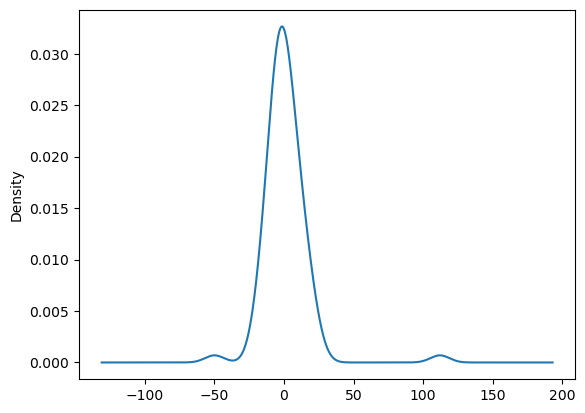

In [40]:
model_arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

C:\Users\dell\AppData\Local\Temp\ipykernel_14576\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: xlabel='Month'>

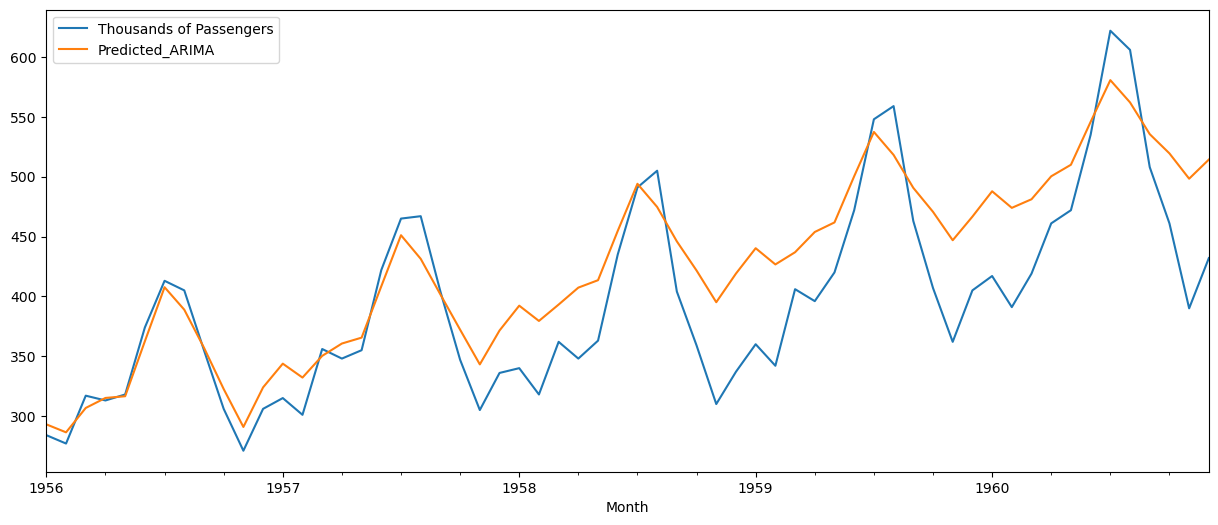

In [42]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot(figsize=(15,6))

In [43]:
# SARIMAX MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))

C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\dell\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 27 Feb 2024   AIC                            548.481
Time:                                     18:33:59   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.938      0.638      0.524      -1.240       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4524      0.894     -0.506      0.613      -2.204       1.300
ma.L1          0.1838      1.164      0.158      0.875      -2.098       2.466
ma.L2         -0.5341      1.262     -0.423      0.672      -3.008       1.940
ma.L3         -0.0987      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.789       0.534
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.946
sigma2        87.7327     81.160      1.081      0.280     -71.337     246.803
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
test_data.tail()

,Thousands of Passengers,Passngers first difference,Passangers second difference,Passngers 12 difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,562.087162
1960-09-01,508.0,-98.0,-82.0,45.0,535.576035
1960-10-01,461.0,-47.0,51.0,54.0,519.475621
1960-11-01,390.0,-71.0,-24.0,28.0,498.338487
1960-12-01,432.0,42.0,113.0,27.0,514.308522


In [51]:
# prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [58]:
pred_SARIMA=model_SARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals_SARIMA=test_data['Thousands of Passengers']-pred_SARIMA

In [59]:
residuals_SARIMA

Month
1956-01-01     -2.184767
1956-02-01     -4.277369
1956-03-01      7.083445
1956-04-01      2.323113
1956-05-01      6.664788
1956-06-01     19.050002
1956-07-01      9.601791
1956-08-01     19.928591
1956-09-01      5.554217
1956-10-01     -4.218423
1956-11-01     -1.564488
1956-12-01     -6.436245
1957-01-01     -4.957855
1957-02-01    -13.011885
1957-03-01     14.010952
1957-04-01      6.209815
1957-05-01     13.205652
1957-06-01     37.479899
1957-07-01     32.673258
1957-08-01     53.826800
1957-09-01     27.078009
1957-10-01     10.076473
1957-11-01      6.337601
1957-12-01     -1.813062
1958-01-01     -4.747507
1958-02-01    -20.125670
1958-03-01     -3.536746
1958-04-01    -16.703152
1958-05-01     -1.162892
1958-06-01     28.708472
1958-07-01     37.424357
1958-08-01     71.140456
1958-09-01      6.892336
1958-10-01      2.421467
1958-11-01     -7.838342
1958-12-01    -19.487883
1959-01-01     -2.964469
1959-02-01    -13.868973
1959-03-01     23.157125
1959-04-01     14.4

<AxesSubplot: ylabel='Density'>

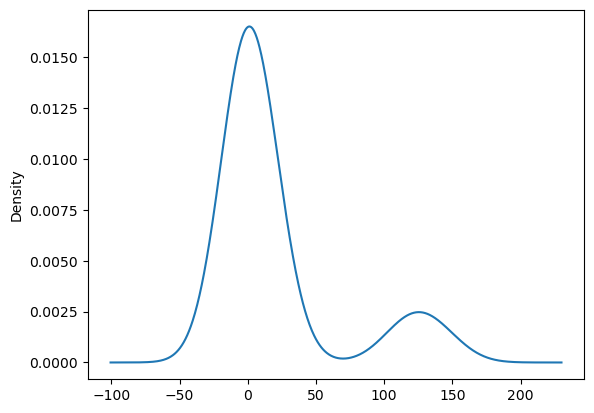

In [60]:
model_SARIMA_fit.resid.plot(kind='kde')

In [61]:
test_data['Predicted SARIMA']=pred_SARIMA

C:\Users\dell\AppData\Local\Temp\ipykernel_14576\751248561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted SARIMA']=pred_SARIMA


In [62]:
test_data

,Thousands of Passengers,Passngers first difference,Passangers second difference,Passngers 12 difference,Predicted_ARIMA,Predicted SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,293.029079,286.184767
1956-02-01,277.0,-7.0,-13.0,44.0,286.373683,281.277369
1956-03-01,317.0,40.0,47.0,50.0,306.751302,309.916555
1956-04-01,313.0,-4.0,-44.0,44.0,315.103006,310.676887
1956-05-01,318.0,5.0,9.0,48.0,316.531781,311.335212
1956-06-01,374.0,56.0,51.0,59.0,362.468002,354.949998
1956-07-01,413.0,39.0,-17.0,49.0,407.638524,403.398209
1956-08-01,405.0,-8.0,-47.0,58.0,388.864316,385.071409
1956-09-01,355.0,-50.0,-42.0,43.0,357.094151,349.445783


<AxesSubplot: xlabel='Month'>

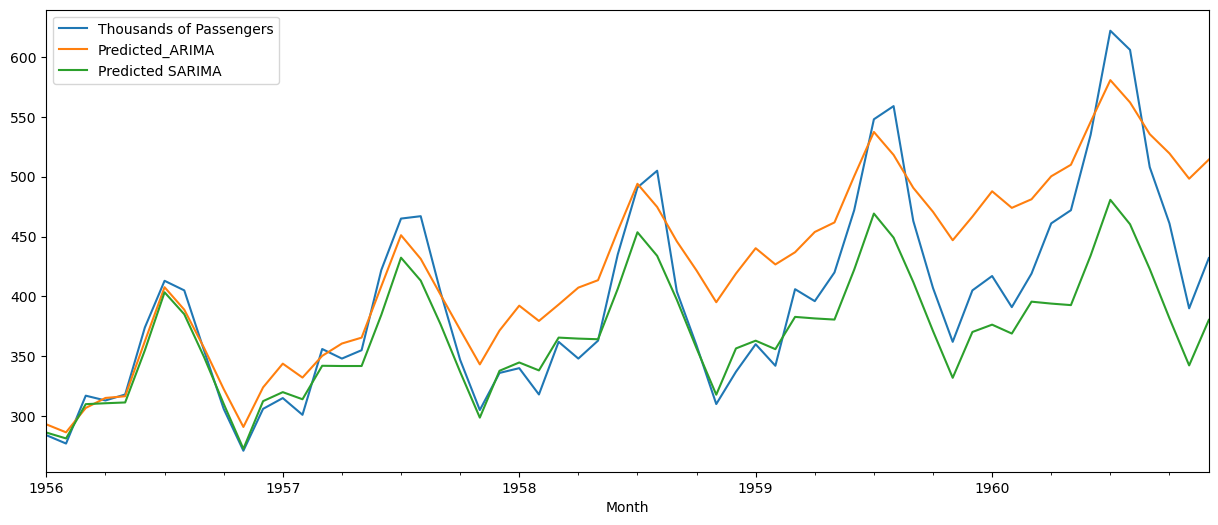

In [63]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA', 'Predicted SARIMA']].plot(figsize=(15,6))